# Drought Track Pruning
4.5.2023 a. stein

Need to prune the drought tracks to kill upon merger.

In [1]:
import pickle
import numpy as np

import sys
sys.path.append('../../')
import ndrought.drought_network as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

/pool0/data/steinjao/drought/drought_impact/notebooks/explore/../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dt_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/drought_tracks'

In [3]:
exp_tag = 'fe2_d2_rt20p'

In [4]:
usdm_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/USDM_tracks_{exp_tag}.pickle')

spi30d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_30d_tracks_{exp_tag}.pickle')

spi180d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_180d_tracks_{exp_tag}.pickle')

## Find Common Terminations

In [5]:
x_tracks = usdm_dtd['x']
y_tracks = usdm_dtd['y']

In [6]:
(1,1) == (1,1)

True

In [7]:
xy_tracks = dict()
i = 0
for x_track, y_track in zip(x_tracks, y_tracks):
    xy_track = []
    for x, y in zip(x_track, y_track):
        xy_track.append((x,y))
    xy_tracks[i] = (xy_track)
    i += 1

In [8]:
xy_tracks

{0: [(-880793.2595618835, 937657.5533512528),
  (-880793.2595618835, 937657.5533512528),
  (-880793.2595618835, 937657.5533512528),
  (-880793.2595618835, 937657.5533512528),
  (-894921.9356556989, 1004304.3585891002),
  (-894883.6965972309, 1002659.4110463797),
  (-894883.6965972309, 1002659.4110463797),
  (-936631.2873177119, 1052694.8690399681),
  (-936999.674156832, 1050558.0440166192),
  (-950487.8380369775, 1062884.206954416),
  (-950487.8380369775, 1062884.206954416),
  (-965557.9473632933, 1071187.988822177),
  (-965557.9473632933, 1071187.988822177),
  (-965557.9473632933, 1071187.988822177),
  (-965557.9473632933, 1071187.988822177),
  (-1069511.4960173685, 1145270.3617471945),
  (-1069511.4960173685, 1145270.3617471945),
  (-1042691.4081165388, 1174588.0315977111),
  (-1042691.4081165388, 1174588.0315977111),
  (-1042691.4081165388, 1174588.0315977111),
  (-1044136.5617034477, 1171679.4921000442)],
 1: [(-1051067.9755862576, 2723122.80933647),
  (-1098521.6107212976, 2725902

In [9]:
terminations = dict()
for key, t_track in zip(xy_tracks.keys(), usdm_dtd['t']):
    terminations[key] = (t_track[-1],*xy_tracks[key][-1])

In [10]:
terminations

{0: (24, -1044136.5617034477, 1171679.4921000442),
 1: (36, -1164271.6894073014, 2736611.4053336694),
 2: (36, -1280701.834162679, 2276377.465454239),
 3: (36, -1308704.3043273042, 1649401.779780554),
 4: (311, -1705426.173792906, 2897423.395270335),
 5: (40, -1304908.2325119684, 1605588.8375551337),
 6: (41, -826351.3620999111, 1491519.827188097),
 7: (311, -1705426.173792906, 2897423.395270335),
 8: (311, -1705426.173792906, 2897423.395270335),
 9: (311, -1705426.173792906, 2897423.395270335),
 10: (311, -1705426.173792906, 2897423.395270335),
 11: (311, -1705426.173792906, 2897423.395270335),
 12: (311, -1705426.173792906, 2897423.395270335),
 13: (300, -1215096.0310059327, 2838059.539104759),
 14: (453, -1124389.5785628376, 2177318.7241034573),
 15: (453, -1124389.5785628376, 2177318.7241034573),
 16: (453, -1124389.5785628376, 2177318.7241034573),
 17: (453, -1124389.5785628376, 2177318.7241034573),
 18: (453, -1124389.5785628376, 2177318.7241034573),
 19: (453, -1124389.578562837

In [11]:
like_terminations = []
for key_a in terminations.keys():
    like_term = [key_a]
    term_a = terminations[key_a]
    for key_b in terminations.keys():
        if key_a != key_b and term_a == terminations[key_b]:
            like_term.append(key_b)

    like_term = list(set(like_term))
    if len(like_term) > 1 and not like_term in like_terminations:
        like_terminations.append(like_term)

In [12]:
like_terminations

[[4, 7, 8, 9, 10, 11, 12],
 [14, 15, 16, 17, 18, 19],
 [33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 49, 50, 51, 52],
 [64, 63],
 [65, 66, 67, 68, 71],
 [74,
  75,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  97,
  98,
  99,
  101,
  102]]

## Cumulative Area Curves

In [13]:
usdm_dtd['s']

[array([  555,   555,   555,   555,  2444,  2396,  2396,  5569,  5516,
         6759,  6759,  7580,  7580,  7580,  7580, 19578, 19578, 24283,
        24283, 24283, 23909]),
 array([11357, 15507, 19969, 22916, 23669, 23669, 23669]),
 array([5055, 6198, 9512, 6136, 6136]),
 array([5203, 4726, 2618, 1806, 1806]),
 array([ 33784,  30865,  19188,  24367,  20132,  13188,  12428,  12321,
         12321,  11798,  12210,  12210,  12806,  12806,  12806,  12806,
         13724,  13724,  13725,  13975,  13975,  13975,  13975,  72446,
         72446,  72446,  76495,  76495,  76495,  76495,  76495,  76495,
         83995,  83995,  84129,  83701,  84473, 119501, 142082, 165031,
        156804, 159454, 156203, 157977, 157977, 172761, 184256, 194179,
        197214, 202682, 202682, 202682, 202672, 202682, 202682, 202682,
        201910, 201910, 201909, 200810, 198534, 183638, 178890, 176005,
        169946, 165631, 134251, 113970, 113165, 100029, 101827, 102019,
        102369, 103316,  84067,  82582, 

In [14]:
cum_s = dict()
i = 0
for s_track in usdm_dtd['s']:
    cum_s[i] = np.cumsum(s_track)
    i += 1

In [15]:
cum_s

{0: array([   555,   1110,   1665,   2220,   4664,   7060,   9456,  15025,
         20541,  27300,  34059,  41639,  49219,  56799,  64379,  83957,
        103535, 127818, 152101, 176384, 200293]),
 1: array([ 11357,  26864,  46833,  69749,  93418, 117087, 140756]),
 2: array([ 5055, 11253, 20765, 26901, 33037]),
 3: array([ 5203,  9929, 12547, 14353, 16159]),
 4: array([   33784,    64649,    83837,   108204,   128336,   141524,
          153952,   166273,   178594,   190392,   202602,   214812,
          227618,   240424,   253230,   266036,   279760,   293484,
          307209,   321184,   335159,   349134,   363109,   435555,
          508001,   580447,   656942,   733437,   809932,   886427,
          962922,  1039417,  1123412,  1207407,  1291536,  1375237,
         1459710,  1579211,  1721293,  1886324,  2043128,  2202582,
         2358785,  2516762,  2674739,  2847500,  3031756,  3225935,
         3423149,  3625831,  3828513,  4031195,  4233867,  4436549,
         4639231,  4841

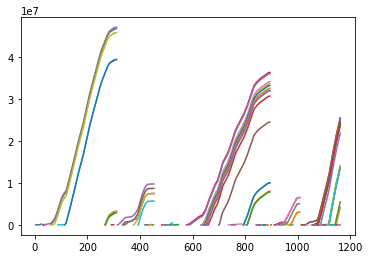

In [16]:
fig, ax = plt.subplots()

for cum_s_key, t_track in zip(cum_s.keys(), usdm_dtd['t']):
    ax.plot(t_track, cum_s[cum_s_key])

In [17]:
like_terminations[0]

[4, 7, 8, 9, 10, 11, 12]

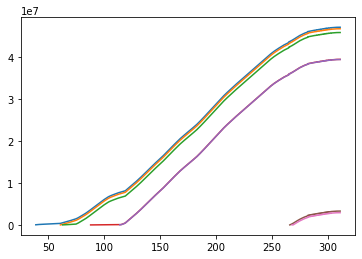

In [18]:
fig, ax = plt.subplots()

for cum_s_key in like_terminations[0]:
    ax.plot(usdm_dtd['t'][cum_s_key], cum_s[cum_s_key])

In [19]:
for key_a in like_terminations[0]:
    cum_s_a = cum_s[key_a]
    for key_b in like_terminations[0]:
        cum_s_b = cum_s[key_b]
        common_range = np.min((len(cum_s_a), len(cum_s_b)))
        print(cum_s_a[-1*common_range:] - cum_s_b[-1*common_range:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[361638 361638 361638 361638 361638 361638 361638 361638 361638 361638
 361638 361638 361638 361638 361638 361638 361638 361638 361638 361638
 361638 361638 361638 361638 361638 361638 361638 361638 361638 361638
 361638 361638 361638 361638 361638 361638 361638 361638 361638 361638
 361638 361638 361638 361638 361638 361638 361638 361638 361638 361638
 

It looks like crossing curves isn't an issue ... which makes sense when you think about how they're constructed, (only the tracks following the largest events will have the largest output)

In [20]:
term_i = 4

mat_size = len(like_terminations[term_i])
s_mat = np.zeros((mat_size, mat_size))

for i, key_a in enumerate(like_terminations[term_i]):
    sum_a = cum_s[key_a][-1]
    for j, key_b in enumerate(like_terminations[term_i]):
        sum_b = cum_s[key_b][-1]
        s_mat[i, j] = sum_a-sum_b

s_mat >= 0

array([[ True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True, False],
       [False, False, False,  True,  True]])

In [21]:
np.all(s_mat[0, :] >= 0)

False

In [22]:
found_i = -1
found_track = -1

i=0
while found_i == -1 and i < s_mat.shape[0]:
    if np.all(s_mat[i, :] >= 0):
        found_i = i
        found_track = like_terminations[term_i][i]
    i += 1

found_track

66

In [23]:
select_tracks = []

for like_terms in like_terminations:
    mat_size = len(like_terms)
    s_mat = np.zeros((mat_size, mat_size))

    for i, key_a in enumerate(like_terms):
        sum_a = cum_s[key_a][-1]
        for j, key_b in enumerate(like_terms):
            sum_b = cum_s[key_b][-1]
            s_mat[i, j] = sum_a-sum_b

    s_mat >= 0

    found_i = -1
    found_track = -1

    i=0
    while found_i == -1 and i < s_mat.shape[0]:
        if np.all(s_mat[i, :] >= 0):
            found_i = i
            found_track = like_terms[i]
        i += 1

    select_tracks.append(found_track)
select_tracks

[4, 14, 33, 63, 66, 74]

## Pruning

Let's make a filter

In [24]:
like_terminations

[[4, 7, 8, 9, 10, 11, 12],
 [14, 15, 16, 17, 18, 19],
 [33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 49, 50, 51, 52],
 [64, 63],
 [65, 66, 67, 68, 71],
 [74,
  75,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  97,
  98,
  99,
  101,
  102]]

In [25]:
termination_filter = []

for term in np.hstack(like_terminations):
    if not term in select_tracks:
        termination_filter.append(term)

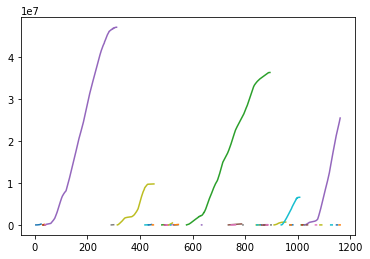

In [26]:
fig, ax = plt.subplots()

for cum_s_key, t_track in zip(cum_s.keys(), usdm_dtd['t']):
    if not cum_s_key in termination_filter:
        ax.plot(t_track, cum_s[cum_s_key])

Now let's try to boil it down

In [27]:
def create_txy_points(x_tracks, y_tracks, t_tracks):
    txy_tracks = dict()
    i = 0
    for x_track, y_track, t_track in zip(x_tracks, y_tracks, t_tracks):
        txy_track = []
        for x, y, t in zip(x_track, y_track, t_track):
            txy_track.append((t,x,y))
        txy_tracks[i] = (txy_track)
        i += 1
    return txy_tracks

In [28]:
txy_points = create_txy_points(usdm_dtd['x'], usdm_dtd['y'], usdm_dtd['t'])

In [29]:
def find_like_terminations(txy_points):
    terminations = dict()
    for key in txy_points.keys():
        terminations[key] = txy_points[key][-1]
    
    like_terminations = []
    for key_a in terminations.keys():
        like_term = [key_a]
        term_a = terminations[key_a]
        for key_b in terminations.keys():
            if key_a != key_b and term_a == terminations[key_b]:
                like_term.append(key_b)

        like_term = list(set(like_term))
        if len(like_term) > 1 and not like_term in like_terminations:
            like_terminations.append(like_term)
    return like_terminations

In [30]:
find_like_terminations(txy_points) == like_terminations

True

In [31]:
def create_area_filter(s_tracks, like_terminations):

    sums = dict()
    i = 0
    for s_track in s_tracks:
        sums[i] = np.sum(s_track)
        i += 1

    select_tracks = []

    for like_terms in like_terminations:
        mat_size = len(like_terms)
        s_mat = np.zeros((mat_size, mat_size))

        for i, key_a in enumerate(like_terms):
            sum_a = sums[key_a]
            for j, key_b in enumerate(like_terms):
                sum_b = sums[key_b]
                s_mat[i, j] = sum_a-sum_b

        s_mat >= 0

        found_i = -1
        found_track = -1

        i=0
        while found_i == -1 and i < s_mat.shape[0]:
            if np.all(s_mat[i, :] >= 0):
                found_i = i
                found_track = like_terms[i]
            i += 1

        select_tracks.append(found_track)
    
    termination_filter = []

    for term in np.hstack(like_terminations):
        if not term in select_tracks:
            termination_filter.append(term)

    return termination_filter

In [32]:
area_filter = create_area_filter(usdm_dtd['s'], like_terminations)

In [33]:
for select in select_tracks:
    if select in area_filter:
        print(select)
print('Done')

Done


In [34]:
def filter_track(tracks, track_filter):
    filtered_tracks = []    
    for i, track in enumerate(tracks):
        if not i in track_filter:
            filtered_tracks.append(track)
    return filtered_tracks

In [35]:
def prune_tracks(dtd):
    x_tracks = dtd['x']
    y_tracks = dtd['y']
    t_tracks = dtd['t']
    s_tracks = dtd['s']

    txy_points = create_txy_points(x_tracks, y_tracks, t_tracks)
    like_terminations = find_like_terminations(txy_points)
    area_filter = create_area_filter(s_tracks, like_terminations)

    filtered_dtd = dict()
    for key in dtd.keys():
        filtered_dtd[key] = filter_track(dtd[key], area_filter)

    return filtered_dtd

In [36]:
usdm_dtd_filtered = prune_tracks(usdm_dtd)

In [37]:
find_like_terminations(create_txy_points(usdm_dtd_filtered['x'], usdm_dtd_filtered['y'], usdm_dtd_filtered['t']))

[]

Wonderful! That worked.

In [38]:
usdm_dtd_filtered

{'x': [array([ -880793.25956188,  -880793.25956188,  -880793.25956188,
          -880793.25956188,  -894921.9356557 ,  -894883.69659723,
          -894883.69659723,  -936631.28731771,  -936999.67415683,
          -950487.83803698,  -950487.83803698,  -965557.94736329,
          -965557.94736329,  -965557.94736329,  -965557.94736329,
         -1069511.49601737, -1069511.49601737, -1042691.40811654,
         -1042691.40811654, -1042691.40811654, -1044136.56170345]),
  array([-1051067.97558626, -1098521.6107213 , -1137968.6604158 ,
         -1167895.12305804, -1164271.6894073 , -1164271.6894073 ,
         -1164271.6894073 ]),
  array([-1329917.21236059, -1345530.18279634, -1289070.89003408,
         -1280701.83416268, -1280701.83416268]),
  array([-1419582.04243829, -1395828.20983138, -1329673.58309069,
         -1308704.3043273 , -1308704.3043273 ]),
  array([-1151142.37939972, -1150363.82170168, -1153704.63115661,
         -1117464.38063624, -1074532.78549321, -1063852.03739868,
       